# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
import random

# Import the API key
from api_keys import weather_api_key

# citipy to determine cities based latitude and longitude
from citipy import citipy


## Generate Cities List

In [13]:
# define list that will hold the city names
cities = []

# generate random cities list by looping through random coordinates
for x in range(1300):
    
    # generate random latitude and longitude coordinates
    r_lat = random.randint(-90,90)
    r_lng = random.randint(-180,180)
    
    # generate cities and append list based on randomised lat,lng.
    city = citipy.nearest_city(r_lat,r_lng)
    cities.append(city.city_name)

# delete duplicates with set function
cities = list(set(cities))
len(cities)

541

In [3]:
type(cities)

list

In [4]:
cities[:10]

['yarmouth',
 'otradnoye',
 'pokhara',
 'colinas',
 'bouloupari',
 'salekhard',
 'breyten',
 'punta arenas',
 'keetmanshoop',
 'havoysund']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

# Set up lists to hold reponse info
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = [] 
country = []
date = []

# Set start values
records = 0
sets = 1

# Print statements at beginning 
print("Beginning Data Retrieval")    
print("-----------------------------")

# Loop through the list of cities and perform a request for data for each
for y in cities:
    # request data for each city
    response = requests.get(query_url + y).json()
    
    # Records go up to 50
    if records < 50:
        records += 1
        
    # Sets increase after record 50
    else:
        sets += 1
        records = 0
        
    # Print statement has to go here or record numbers skip when city not found. Not sure why
    print(f"Processing Record {records} of Set {sets} | {y}")

    try:
        city.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
                          
    except KeyError:
        print("City not found. Skipping...")

# Print statements at end
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | yarmouth
Processing Record 2 of Set 1 | otradnoye
Processing Record 3 of Set 1 | pokhara
Processing Record 4 of Set 1 | colinas
Processing Record 5 of Set 1 | bouloupari
Processing Record 6 of Set 1 | salekhard
Processing Record 7 of Set 1 | breyten
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | keetmanshoop
Processing Record 10 of Set 1 | havoysund
Processing Record 11 of Set 1 | mount gambier
Processing Record 12 of Set 1 | temaraia
City not found. Skipping...
Processing Record 13 of Set 1 | maceio
Processing Record 14 of Set 1 | meyungs
City not found. Skipping...
Processing Record 15 of Set 1 | darhan
Processing Record 16 of Set 1 | itarema
Processing Record 17 of Set 1 | sandakan
Processing Record 18 of Set 1 | tingrela
City not found. Skipping...
Processing Record 19 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 20 of Set 1 | vardo
Processing Record

Processing Record 36 of Set 4 | bodmin
Processing Record 37 of Set 4 | port hedland
Processing Record 38 of Set 4 | rawson
Processing Record 39 of Set 4 | banjarmasin
Processing Record 40 of Set 4 | sao felix do xingu
Processing Record 41 of Set 4 | broome
Processing Record 42 of Set 4 | east london
Processing Record 43 of Set 4 | atuona
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | ko samui
Processing Record 46 of Set 4 | sarangani
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | haines junction
Processing Record 49 of Set 4 | ucluelet
Processing Record 50 of Set 4 | ushuaia
Processing Record 0 of Set 5 | dembi dolo
Processing Record 1 of Set 5 | kazuno
Processing Record 2 of Set 5 | tidore
City not found. Skipping...
Processing Record 3 of Set 5 | grand-lahou
Processing Record 4 of Set 5 | natalio
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | saint-pierre
Processing Record 7 o

Processing Record 23 of Set 8 | nanortalik
Processing Record 24 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 25 of Set 8 | srednekolymsk
Processing Record 26 of Set 8 | dingle
Processing Record 27 of Set 8 | ugoofaaru
Processing Record 28 of Set 8 | san francisco
Processing Record 29 of Set 8 | tunceli
Processing Record 30 of Set 8 | castro
Processing Record 31 of Set 8 | kindersley
Processing Record 32 of Set 8 | mirzapur
Processing Record 33 of Set 8 | kewanee
Processing Record 34 of Set 8 | sao jose da coroa grande
Processing Record 35 of Set 8 | zeya
Processing Record 36 of Set 8 | sola
Processing Record 37 of Set 8 | hofn
Processing Record 38 of Set 8 | balakhta
Processing Record 39 of Set 8 | rock springs
Processing Record 40 of Set 8 | djibo
Processing Record 41 of Set 8 | kodiak
Processing Record 42 of Set 8 | bahia blanca
Processing Record 43 of Set 8 | ryotsu
Processing Record 44 of Set 8 | barra do garcas
Processing Record 45 of Set 8 | oga
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Creating a dict from the lists
weather_dict = {
                "City" : city,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date
                }

# Creating a data frame with the dict
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yarmouth,41.7057,-70.2286,4.44,70,1,5.14,US,1610971237
1,Otradnoye,59.7775,30.8181,-4.00,93,90,2.00,RU,1610971237
2,Pokhara,28.2333,83.9833,16.23,46,26,1.30,NP,1610971078
3,Colinas,-6.0258,-44.2492,25.47,87,100,1.63,BR,1610971238
4,Bouloupari,-21.8667,166.0500,25.00,94,0,1.40,NC,1610971238
...,...,...,...,...,...,...,...,...,...
498,Tzaneen,-23.8332,30.1635,24.00,53,20,3.09,ZA,1610971366
499,Aykhal,66.0000,111.5000,-42.31,76,80,1.37,RU,1610971366
500,Bud,39.4470,-86.1758,-2.22,89,53,3.29,US,1610971366
501,Kavaratti,10.5669,72.6420,28.21,67,0,2.35,IN,1610971367


In [9]:
# Show statistics of the new dataframe
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,20.957218,18.820128,9.638410,71.431412,53.159046,3.733300,1.610971e+09
std,33.793309,91.245414,19.501724,21.614118,37.971243,2.650633,7.383538e+01
min,-54.800000,-179.166700,-49.030000,8.000000,0.000000,0.230000,1.610971e+09
25%,-6.820700,-61.879550,-2.000000,61.500000,16.500000,1.725000,1.610971e+09
50%,25.150000,24.662200,16.000000,78.000000,60.000000,3.090000,1.610971e+09
75%,49.793400,100.344850,25.575000,87.000000,90.000000,5.140000,1.610971e+09
max,78.218600,179.316700,37.660000,100.000000,100.000000,16.970000,1.610971e+09


In [15]:
# Export the city data into a .csv
weather_df.to_csv("output_data/cities.csv", encoding="utf-8", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [16]:
# check data types
weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

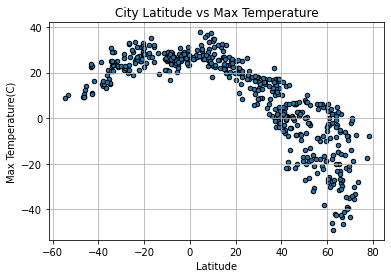

In [21]:
# Create scatter plot, save .png and show the figure
weather_df.plot.scatter(x='Lat', y='Max Temp', grid=True, edgecolors="black", 
                                title="City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.savefig("output_data/Temp_vs_Lat.png")
plt.show()

## Latitude vs. Humidity Plot

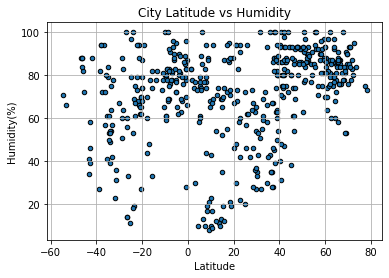

In [23]:
# Create scatter plot, save .png and show the figure
weather_df.plot.scatter(x='Lat', y='Humidity', grid=True, edgecolors="black", title="City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("output_data/Lat_vs_Hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

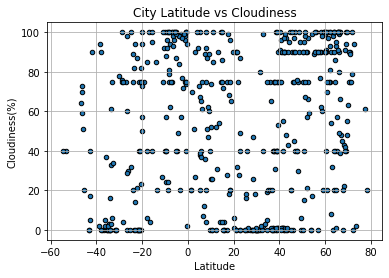

In [25]:
# Create scatter plot, save .png and show the figure
weather_df.plot.scatter(x='Lat', y='Cloudiness', grid=True, edgecolors="black", title="City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("output_data/Lat_vs_Clo.png")
plt.show()

## Latitude vs. Wind Speed Plot

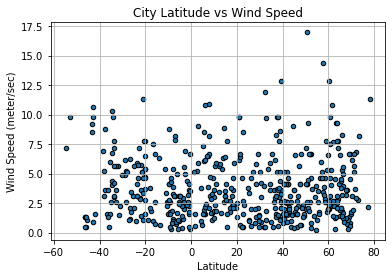

In [29]:
# Create scatter plot, save .png and show the figure
weather_df.plot.scatter(x='Lat', y='Wind Speed', grid=True, edgecolors="black", title="City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meter/sec)")
plt.savefig("output_data/Lat_vs_Win.png")
plt.show()

## Linear Regression

In [32]:
# Create dataframes for Northern and Southern hemisphere
north_hem = weather_df.loc[weather_df['Lat'] >= 0]
south_hem = weather_df.loc[weather_df['Lat'] < 0]

In [37]:
## Linear regression see class activity 6.3 / 10
# Create function
def regress (x_values, y_values, view, name):
    
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, view, fontsize=15,color="red")
        
    # Label plot
    plt.xlabel("Latitude")
    plt.ylabel(str(y_values.name))
    
    # Print r square value
    print(f"The r-value is: {rvalue}")
    
    # Save plot as PNG
    plt.savefig(f"output_data/Lat_vs_{name}.png")
    
    # Show plot
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8605127594609413


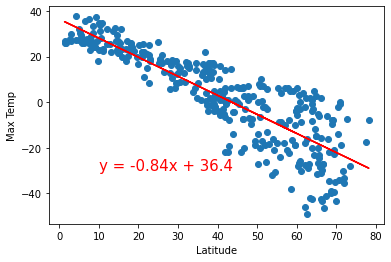

In [38]:
# run function with inputs
x_values = north_hem["Lat"]
y_values = north_hem["Max Temp"]
view = (10, -30)
regress(x_values, y_values, view, "MaxTempN")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5794722169515837


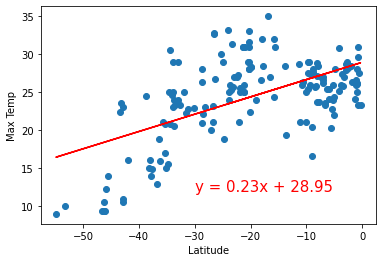

In [41]:
# run function with inputs
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]
view = (-30, 12)
regress(x_values, y_values, view, "MaxTempS")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.45465829675133385


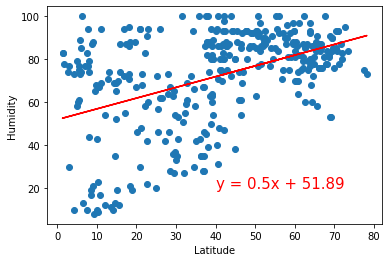

In [44]:
# run function with inputs
x_values = north_hem["Lat"]
y_values = north_hem["Humidity"]
view = (40, 20)
regress(x_values, y_values, view, "HumN")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3024864884467253


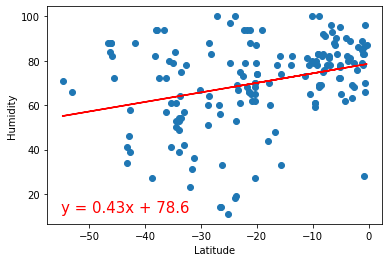

In [46]:
# run function with inputs
x_values = south_hem["Lat"]
y_values = south_hem["Humidity"]
view = (-55, 12)
regress(x_values, y_values, view, "HumS")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.26274433014998466


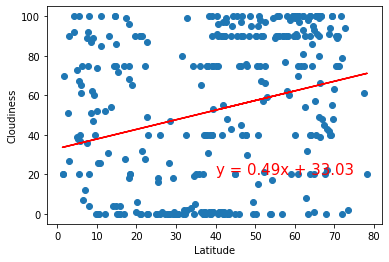

In [47]:
# run function with inputs
x_values = north_hem["Lat"]
y_values = north_hem["Cloudiness"]
view = (40, 20)
regress(x_values, y_values, view, "CloudN")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.5095502811764422


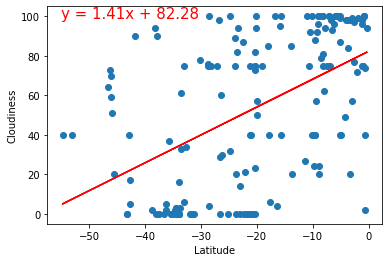

In [49]:
# run function with inputs
x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness"]
view = (-55, 99)
regress(x_values, y_values, view, "CloudS")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004005004807005097


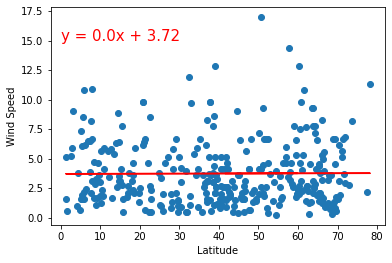

In [51]:
# run function with inputs
x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"]
view = (0, 15)
regress(x_values, y_values, view, "WindN")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.264452115662307


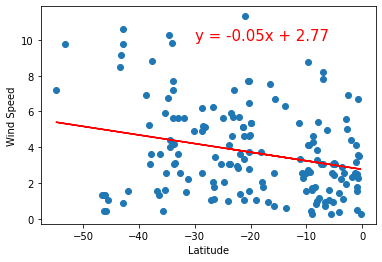

In [53]:
# run function with inputs
x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"]
view = (-30, 10)
regress(x_values, y_values, view, "WindS")